# Introduction to Data
#####    Practical assignment 1


This practical assignment need to be handed in on Brightspace before the deadline, 16:00 14/04/2022. Make sure that every cell is executed/compiled and renamed to 

**Assignment1_Surname1_Surname2.ipynb**

before submitting. For questions contact your TA during the workgroup, or via mail. Depending on whether all questions are sufficiently answered and if enough effort has been put into the assignment, you will get pass (all questions answered and all topics understood well) or fail (not enough effort has been put into this assignment).



**Name 1:** Name Surname - student number

**Name 2:** Name Surname - student number

### Dataset

The aim of this assignment is to learn how to apply the theoretical knowledge you gained in the book and the video clips to real datasets. Today, you will learn how to load data, how datasets are organized, how you can summarize data and how you can plot data. To help us with this we will use the dataset `BikeRental.csv` (modified from original source).

Bikes can be rented and returned at specific points in the city, and the number of bikes that are rented on a day depends on a number of factors. Some potential factors are given in this dataset, which we will visualize in some plots. First we need to import some libraries.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
# # If you are working with Google Colab, run this cell to upload your data
# from google.colab import files
# uploaded = files.upload()

For importing data we will use the <span style="color:red">Pandas</span> library, which has a lot of tools that are useful for data analysis. When reading in data, Pandas will create a <span style="color:red">DataFrame</span>. A Pandas DataFrame is similar to a python dictionairy, in the sense that each column name is a key, and the data below it are the values. The columns in the DataFrame represent the different variables and the rows represent the different cases (observations). We can see all the variables in the DataFrame by printing all the `key` values, or printing the `head/tail` of the file. One key with all its values is called a Series, this is one column in the DataFrame.

In [5]:
raw_data = pd.read_csv("BikeRental.csv")
raw_data.keys()

Index(['date', 'season', 'year', 'month', 'weekday', 'hour', 'workingday',
       'weathersit', 'temperature', 'feeling temperature', 'humidity',
       'windspeed', 'count'],
      dtype='object')

In [6]:
raw_data.head()

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01/01/2011,1,0,1,6,0,0,1,9.84,14.395,81,0.0,16
1,01/01/2011,1,0,1,6,1,0,1,9.02,13.635,80,0.0,40
2,01/01/2011,1,0,1,6,2,0,1,9.02,13.635,80,0.0,32
3,01/01/2011,1,0,1,6,3,0,1,9.84,14.395,75,0.0,13
4,01/01/2011,1,0,1,6,4,0,1,9.84,14.395,75,0.0,1


In [7]:
raw_data.tail()

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
17374,31/12/2012,1,1,12,1,19,1,2,10.66,12.880,60,11.0014,119
17375,31/12/2012,1,1,12,1,20,1,2,10.66,12.880,60,11.0014,89
17376,31/12/2012,1,1,12,1,21,1,1,10.66,12.880,60,11.0014,90
17377,31/12/2012,1,1,12,1,22,1,1,10.66,13.635,56,8.9981,61
17378,31/12/2012,1,1,12,1,23,1,1,10.66,13.635,65,8.9981,49


In this file we have the following variables:

- Date
- Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)
- Year (0: 2011, 1: 2012)
- Month (1 to 12)
- Weekday (0 to 6 for Sunday to Saturday)
- Hour (0 to 23)
- Workingday (0: Weekend or Holiday, 1: Otherwise)
- Weather (1: Clear, 2: Cloudy, 3: Light rain, 4: Heavy rain)
- Temperature (Celsius)
- Feeling temperature (Celsius)
- Humidity (percentage)
- Windspeed (km/h)
- Count (number of rented bikes)

### <span style="color:red"> Question 1 </span>
For each variable, write down what kind of data it is (Categorical, Ordinal, Discrete, Continuous)

(Double click on this cell to edit its contents, and run it when you are done editing)

- Season =
- Month =
- Weekday =
- Workingday = 
- Weather =
- Temperature =
- Windspeed = 
- Count =

A good first step in any analysis is to distill the information in all the cases to a few summary statistics and graphics. As a simple example, the function describe returns a numerical summary: count, mean, standard deviation, minimum, first quartile, median, second quartile, and maximum. 
Python also has built-in functions to compute summary statistics one by one, such as the functions mean or max. 

In [8]:
raw_data['temperature'].describe()

count    17379.000000
mean        20.376474
std          7.894801
min          0.820000
25%         13.940000
50%         20.500000
75%         27.060000
max         41.000000
Name: temperature, dtype: float64

In [9]:
print(raw_data['temperature'].mean())

20.3764739052879


### <span style="color:red"> Question 2 </span>
Calculate the IQR of the feeling temperature and of the windspeed (and print both of them)

In [10]:
#Your answer here!

<span style="color:green"> %%  Double click to write your interpretation here %%

    

For categorical data, it makes more sense to look at the sample frequency or relative frequency distribution. The function value_counts does this for you by counting the number of times each kind of response was given. For example, to see the number of cases that were recorded in the different seasons we can type:

In [11]:
raw_data['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

### Subsets of the dataset

To answer specific questions about the data, it is important that we can zoom in on different parts of the data. For example, we want to look at all the non-working days where the temperature was higher than 10°C, we can do that as follows:

In [12]:
#With multiple conditions the brackets around each condition are necessary!
no_work_temp_over_10 = raw_data[(raw_data['workingday'] == 0) & (raw_data['temperature'] > 10)]

print("Number of items in subset:    ", no_work_temp_over_10.shape[0])
print("Number of items in all data: ", raw_data.shape[0])
no_work_temp_over_10.head()

Number of items in subset:     4787
Number of items in all data:  17379


,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
9,01/01/2011,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14
10,01/01/2011,1,0,1,6,10,0,1,15.58,19.695,76,16.9979,36
11,01/01/2011,1,0,1,6,11,0,1,14.76,16.665,81,19.0012,56
12,01/01/2011,1,0,1,6,12,0,1,17.22,21.210,77,19.0012,84
13,01/01/2011,1,0,1,6,13,0,2,18.86,22.725,72,19.9995,94


As can be seen above, the It's often useful to extract all individuals (cases) in a data set that have specific characteristics. We accomplish this through conditioning commands. Look at the two following expressions used in the previous piece of code: 

In [13]:
raw_data['workingday'] == 0

0         True
1         True
2         True
3         True
4         True
         ...  
17374    False
17375    False
17376    False
17377    False
17378    False
Name: workingday, Length: 17379, dtype: bool

In [14]:
raw_data['temperature'] > 10

0        False
1        False
2        False
3        False
4        False
         ...  
17374     True
17375     True
17376     True
17377     True
17378     True
Name: temperature, Length: 17379, dtype: bool

These commands produce a series of TRUE and FALSE values. There is one value for each respondent, where TRUE indicates that it was a non-working day (via the first command) or the temperature was higher than 10 (second command).

Therefore, to extract all the non-working days where the temperature was higher than 10°C, the following command was used: 

In [15]:
raw_data[(raw_data['workingday'] == 0) & (raw_data['temperature'] > 10)]

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
9,01/01/2011,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14
10,01/01/2011,1,0,1,6,10,0,1,15.58,19.695,76,16.9979,36
11,01/01/2011,1,0,1,6,11,0,1,14.76,16.665,81,19.0012,56
12,01/01/2011,1,0,1,6,12,0,1,17.22,21.210,77,19.0012,84
13,01/01/2011,1,0,1,6,13,0,2,18.86,22.725,72,19.9995,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17345,30/12/2012,1,1,12,0,14,0,1,12.30,13.635,36,31.0009,160
17346,30/12/2012,1,1,12,0,15,0,1,11.48,12.880,38,22.0028,138
17347,30/12/2012,1,1,12,0,16,0,1,11.48,12.120,38,27.9993,133
17348,30/12/2012,1,1,12,0,17,0,1,10.66,11.365,41,22.0028,123


We can also look at specific cases in our data by indexing our DataFrame. For example, if we want all of the data for the first 10 respondents, we can use the `iloc` function of the dataframe.

In [16]:
raw_data.iloc[0:10,:]

,date,season,year,month,weekday,hour,workingday,weathersit,temperature,feeling temperature,humidity,windspeed,count
0,01/01/2011,1,0,1,6,0,0,1,9.84,14.395,81,0.0000,16
1,01/01/2011,1,0,1,6,1,0,1,9.02,13.635,80,0.0000,40
2,01/01/2011,1,0,1,6,2,0,1,9.02,13.635,80,0.0000,32
3,01/01/2011,1,0,1,6,3,0,1,9.84,14.395,75,0.0000,13
4,01/01/2011,1,0,1,6,4,0,1,9.84,14.395,75,0.0000,1
5,01/01/2011,1,0,1,6,5,0,2,9.84,12.880,75,6.0032,1
6,01/01/2011,1,0,1,6,6,0,1,9.02,13.635,80,0.0000,2
7,01/01/2011,1,0,1,6,7,0,1,8.20,12.880,86,0.0000,3
8,01/01/2011,1,0,1,6,8,0,1,9.84,14.395,75,0.0000,8
9,01/01/2011,1,0,1,6,9,0,1,13.12,17.425,76,0.0000,14


Similarly, we can look at the season of each observation by typing:

In [17]:
#Here we want to print one column, the season column, so we could also say raw_data.iloc[:,1],
#but since we want it printed in a nice table, we can refer to the first column with 
#raw_data.iloc[:,1:2].

raw_data.iloc[:,1:2]

,season
0,1
1,1
2,1
3,1
4,1
...,...
17374,1
17375,1
17376,1
17377,1


Or just type the column name of the one that you want to print.

In [18]:
raw_data['season']

0        1
1        1
2        1
3        1
4        1
        ..
17374    1
17375    1
17376    1
17377    1
17378    1
Name: season, Length: 17379, dtype: int64

### <span style="color:red"> Question 3.1 </span>
Create subsets of the following requirements (and give them fitting names), and print their head:

- Season of Spring and Summer, only from Monday to Wednesday
- Workingday from 08:00 to 20:00, or a non workingday
- Light rainy holidays (excluding holidays during the wekend)
- Monday to Friday, with holidays, that had more than 20 bikes rented
- The last 10 cases in the dataset


In [19]:
#Your code here!

In [20]:
#Your code here!

In [21]:
#Your code here!

In [22]:
#Your code here!

In [23]:
#Your code here!

If we are simply interested in the distribution of weather over each weekday, we can simply use the `groupby` command

In [24]:
raw_data.groupby('weekday')['weathersit'].value_counts().unstack()

weathersit,1,2,3,4
weekday,,,,
0,1765.0,568.0,169.0,NaN
1,1582.0,726.0,170.0,1.0
2,1522.0,694.0,237.0,NaN
3,1568.0,613.0,293.0,1.0
4,1656.0,636.0,179.0,NaN
5,1645.0,659.0,183.0,NaN
6,1675.0,648.0,188.0,1.0


By doing unstack we are transforming the last level of the index to the columns. All the weathersit values are now the columns of a the dataframe and when a weather situation has not happened in a weekday, the correcponding position in the table get Nan value. For example the table above shows that there is no Wednesday with heavy rain in the dataset.

### <span style="color:red"> Question 3.2 </span>
Create groups of the following criteria, and print their table:

- Season and workingdays. What does the first row of the table show? 
- Month and temperature in 10 sections (hint, use the pandas function `pd.cut()` to create bins of continuous data)

In [25]:
#Your code here!

<span style="color:green"> %%  Double click to write your interpretation here %%

In [26]:
#Your code here!

### Plotting your data

Plotting your data (correctly) is very important. There are many possible plots you could use and some are better than others for a given dataset or data type. To create nice plots, we will be using the `Seaborn` library, which is based on Matplotlib. In the first cell where we import libraries we already included this library with `import seaborn as sns`. Below are some examples

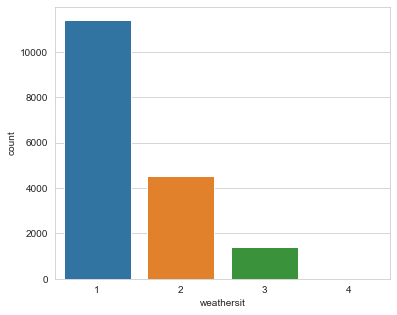

In [27]:
plt.figure(figsize=(6,5))
sns.countplot(x=raw_data['weathersit'])
plt.show()

<Figure size 576x360 with 0 Axes>

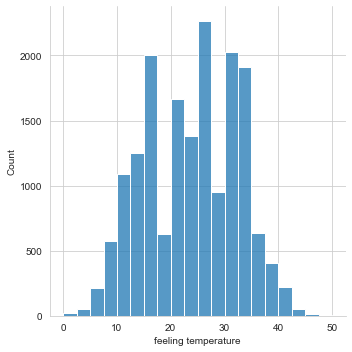

In [28]:
plt.figure(figsize=(8,5))
sns.displot(x=raw_data['feeling temperature'], kde=False, rug=False, bins = 20)
plt.show()

We can construct a box plot for a single variable with the following command:

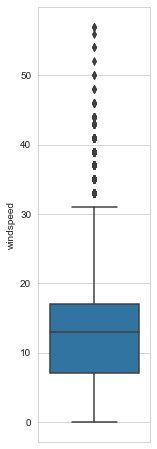

In [29]:
plt.figure(figsize=(2,8))
sns.boxplot(y = raw_data['windspeed'])
plt.show()

The purpose of a boxplot is to provide a thumbnail sketch of a variable for the purpose of comparing across several categories. So we can, for example, compare the temperature across the four seasons by:

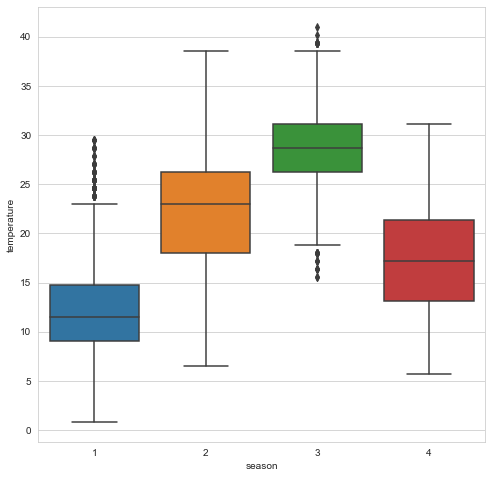

In [30]:
plt.figure(figsize=(8,8))
sns.boxplot(x = raw_data['season'], y = raw_data['temperature'])
plt.show()

For visualization of associations, we usually use scatter plots. For Example, let's plot the scatter plot of the number of bikes rented versus temperature:

Text(0.5, 1.0, 'Count vs Temperature')

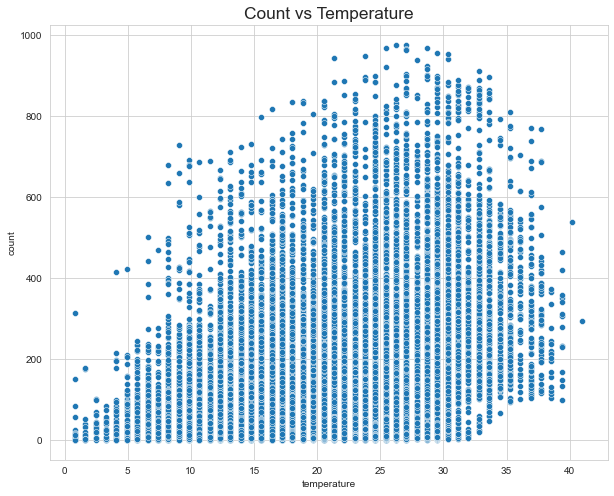

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x = raw_data['temperature'], y = raw_data['count'])
plt.title("Count vs Temperature", fontsize = "xx-large")

Looking at the scatter plot of the number of rented bikes versus temperature, what can you say about association between these two variables?

<span style="color:green"> %%  Double click to write your answer here %%

Now let's look at the scatter plot of the number of rented bikes versus season:

Text(0.5, 1.0, 'Count vs Season')

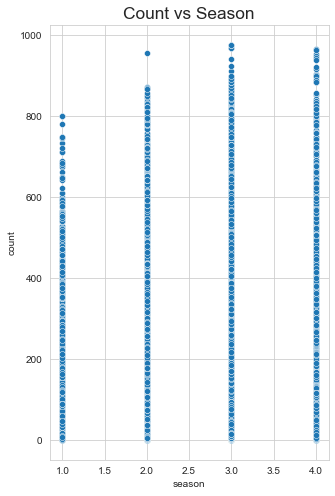

In [32]:
plt.figure(figsize=(5,8))
sns.scatterplot(x = raw_data['season'], y = raw_data['count'])
plt.title("Count vs Season", fontsize = "xx-large")

As can be seen in the plot, it is hard to assess association as the explanatory variable is categorical. In cases like this, a box plot makes it easier to search for association:

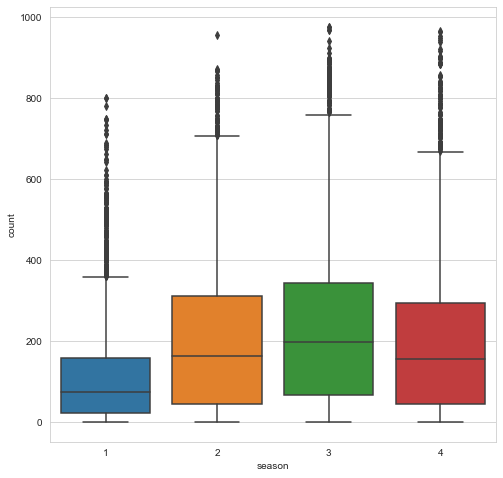

In [33]:
plt.figure(figsize=(8,8))
sns.boxplot(x = raw_data['season'], y = raw_data['count'])
plt.show()

In the above plot, it can be seen that the number of rented bikes is associated with the season as the median of the count changes with different seasons.

# <span style="color:red"> Question 4 </span>

Now it is time for you to create some plots! Use the Pandas documentation to see the different kinds of plots you can use, as well as more options. Answer the following questions, and motivate your answers with plots.

- What do you think is more strongly associated with the number of rented bikes, the weather situation, or the feeling temperature being higher than 35? (You can use two box plots one for each variable and compare associations)
- Are more bikes rented more on non-working days vs working days?
- Is there an association between the feeling temperature and humidity?
- Which month has the most bike rentals? (You can use "sns.barplot(x = , y = ,...)" to make bar plot)
- Can you figure out which of the four variables: temperature, feeling temperature, humidity, and windspeed, are most strongly associated with the number of rented bikes?   



In [34]:
#Your code here!

<span style="color:green"> %%  Double click to write your motivation here %%

In [35]:
#Your code here!

<span style="color:green"> %%  Double click to write your motivation here %%

In [36]:
#Your code here!

<span style="color:green"> %%  Double click to write your motivation here %%

In [37]:
#Your code here!

<span style="color:green"> %%  Double click to write your motivation here %%

In [38]:
#Your code here!

<span style="color:green"> %%  Double click to write your motivation here %%